In [1]:
import osmnx as ox
import networkx as nx
from networkx.classes.function import path_weight
import heapq
import math

In [2]:
# speeds (meters per minute) over 
speeds = [350, 350, 500, 500, 600, 600, 550, 500, 400, 300, 600, 550, 500, 400, 300, 600, 550, 500, 400, 300]

In [4]:
def shortest_path_at_time( graph, node1, node2, t=0 ):
    """
    Compute the shortest path in term of travel time from src to dst
    if the starting time point is t.
    """
    sp = nx.shortest_path( graph, source=node1, target=node2, weight='length' )
    
    return path_weight( graph, sp, weight='length' ) / speeds[math.floor(t)]

In [5]:
def euclidean_heuristic(graph, node1, node2, t=0):
    """
    Calculates the Euclidean distance between two nodes in a graph.
    """
    pos1 = graph.nodes[node1]
    pos2 = graph.nodes[node2]
    return ( ((pos1['x'] - pos2['x'])**2 + (pos1['y'] - pos2['y'])**2)**0.5 ) / speeds[math.floor(t)]

In [5]:
def astar_shortest_path(graph, origin_node, destination_node, heuristic=euclidean_heuristic):
    """
    Computes the shortest path between two nodes in a graph using the A* algorithm.

    Args:
        graph (nx.Graph): The graph to search.
        origin_node (int): The ID of the origin node.
        destination_node (int): The ID of the destination node.
        heuristic (callable, optional): A heuristic function that estimates the cost
            from a given node to the destination node. Defaults to None, in which
            case Dijkstra's algorithm is effectively used.

    Returns:
        list  : A list of node IDs representing the shortest path, or None if no path is found.
        weight: The weight of the shortest path.
    """

    if origin_node not in graph or destination_node not in graph:
        return None, None  # Nodes not in graph

    if origin_node == destination_node:
        return [origin_node], 0

    g_score = 0
    h_score = heuristic( origin_node, destination_node, 0 )
    
    open_set = [(g_score + h_score, g_score, 0, h_score, 
                 origin_node, [origin_node])]  # (f_score, node, path)
    closed_set = set()

    while open_set:
        # note that h_score is just an estimate, therefore f_score is not exact.
        f_score, g_score, t, h_score, current_node, path = heapq.heappop(open_set)

        # if that h_score = 0, then shortest path's weight = f_score
        if current_node == destination_node:
            return path, f_score

        if current_node in closed_set:
            continue

        closed_set.add(current_node)

        for neighbor, edge_data in graph[current_node].items():
            if neighbor in closed_set:
                continue

            g_score_neighbor = g_score + edge_data.get('length', 1) / speeds[math.floor(t)]
            t = t + edge_data.get('length', 1) / speeds[math.floor(t)]
            h_score_neighbor = heuristic( neighbor, destination_node, t )
            f_score_neighbor = g_score + h_score

            heapq.heappush(open_set, (f_score_neighbor, g_score_neighbor, t, h_score_neighbor, neighbor, path + [neighbor]))

    return None, None  # No path found


In [7]:
# Example usage:
try:
    # Download a graph (e.g., a part of a city)
    place_name = "Ho chi minh city"
    graph = ox.graph_from_place(place_name, network_type="drive")
except Exception as e:
    print(f"An error occurred: {e}")
    
# Get origin and destination nodes (you can replace these with actual node IDs)
origin_point = (10.768856, 106.725019)
destination_point = (10.839613, 106.845798)

origin_node = ox.nearest_nodes(graph, origin_point[1], origin_point[0])
destination_node = ox.nearest_nodes(graph, destination_point[1], destination_point[0])

In [ ]:
# Example usage:
try:
    # Download a graph (e.g., a part of a city)
    place_name = "Ho chi minh city"
    graph = ox.graph_from_place(place_name, network_type="drive")
except Exception as e:
    print(f"An error occurred: {e}")
    
# Get origin and destination nodes (you can replace these with actual node IDs)
origin_point = (10.768856, 106.725019)
destination_point = (10.839613, 106.845798)

origin_node = ox.nearest_nodes(graph, origin_point[1], origin_point[0])
destination_node = ox.nearest_nodes(graph, destination_point[1], destination_point[0])

# Calculate shortest path using A*
shortest_path, weight = astar_shortest_path(graph, 
                                    origin_node, 
                                    destination_node, 
                                    heuristic=lambda n1, n2, t: shortest_path_at_time(graph, n1, n2, t))

if shortest_path:
    print("Shortest path found:", shortest_path)
    print("Weight             : ", weight)
    # Optionally, visualize the path
    ox.plot_graph_route(graph, shortest_path, node_size=3)
else:
    print("No path found.")

Shortest path found: [3700940837, 6855606318, 6855606317, 6855606316, 6855606314, 6855606313, 4907667941, 2275303187, 4907667773, 4907667699, 11640279650, 6848079309, 6639800650, 11873573659, 714480604, 714480394, 366414360, 6785918021, 6785918023, 11896336823, 11896336783, 1834116615, 2275303191, 724232845, 5614661188, 5614661186, 1834117114, 6627017363, 5735458215, 6754398775, 6754398772, 366384168, 6754398776, 676036667, 6754371052, 2028465966, 5748445128, 6754344791, 5748445135, 6754343974, 6754343975, 676035822, 6760299234, 6754296825, 6754296829, 6754296832, 4066414553, 6754296831, 6754296833, 2217825343, 6754129803, 4519453270, 5778616014, 4934947979, 2217876796, 2217876792, 2217878484, 2217878488, 2024972808, 2217884564, 2217884568, 5755237684, 3301856095, 4615796000, 12084602277, 366419231, 8359554062, 5755237908, 366447236, 366408655, 5755237637, 2956123411, 2956123408, 366404347, 8359656486, 366388064, 2956123339, 5416650864, 2956123353, 2956123340, 366473118, 2956123387, 29

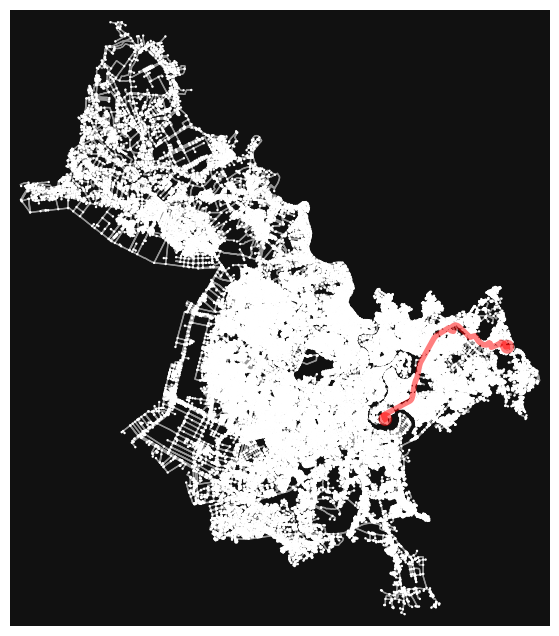

In [8]:
# Calculate shortest path using A*
shortest_path, weight = astar_shortest_path(graph, 
                                    origin_node, 
                                    destination_node, 
                                    heuristic=lambda n1, n2, t: euclidean_heuristic(graph, n1, n2, t))

if shortest_path:
    print("Shortest path found:", shortest_path)
    print("Weight             : ", weight)
    # Optionally, visualize the path
    ox.plot_graph_route(graph, shortest_path, node_size=3)
else:
    print("No path found.")